# Regressão Linear

## Leia antes de rodar o Jupyter Notebook


A parte teórica deste modelo se encontra na apostila. Aqui abordaremos o assunto de uma maneira muito mais simples.

Na prática, a técnica de regressão linear é utilizada para se estimar valores resposta dado algumas variáveis de entrada. Por exemplo, vamos imaginar o consumo de combustível de um carro levando em conta seu histórico de consumo. Suponha que a cada vez que você sai com seu carro, você anota quantos quilômetros andou e o consumo de combustível para esse percurso. Leve em conta que os percursos feitos foram em média de 20km. Certo dia você planeja uma viagem um pouco mais longa que o comum, 50km, e deseja saber aproximadamente quantos litros de gasolina irá consumir para este percurso. Com a regressão linear, este tipo de predição é possivel prever o quanto que será consumido com base no histórico. Imagine que em todos os dados anotados, nenhum dos seus percursos deu 15km e você deseja saber qual seria seu consumo para esta distância.

Com este exemplo em mente vamos seguir para codificação, como de costume vamos importar inicialmente as bibliotecas que iremos usar.

In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
random.seed(1234)

Desta vez não utilizaremos um dadaset pronto: iremos criar nossos próprios dados para a análise. Teremos 70 números para ser nossa variável input X, que representa o número de quilômetros andados, e 70 valores para ser nossa variável output Y, que será o consumo de combustivel do automóvel (estamos formando pares ordenados). Abaixo temos um dataset gerado de forma aleatória para induzir o método de forma eficiente. O X é gerado por uma distribuição uniforme e o Y através de uma função linear padrão mais um erro criado segundo uma distribubição Normal.

### Atenção nao rode a cedula novamente sem antes ler tudo, ela implica no resultado uma vez que os numeros estao distribuidos de forma aleatoria

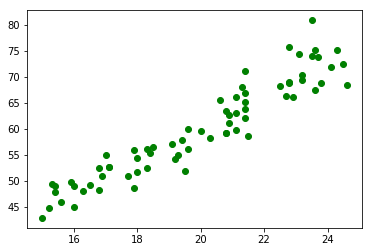

In [37]:
#x
ux = 20
varx = 2
x=np.empty(70)#criando array para alocar os numeros
for i in range(0,70):
    x[i]=round(random.uniform(15,25),1)# iremos arredondar os numero para 1 casa decimal

#y
e = np.empty(70)
for i in range(0,70):
    e[i]= round(random.gauss(0,3),1)

y= 0.2*random.uniform(1,4)+3*x+e
#plotando para visualizar os dados
plt.plot( x, y, 'go')
plt.show()

Agora com os dados criados, vamos manipulá-los para deixar no formato mais fácil de trabalhar.

In [38]:
dataset = np.empty([70,2])# dataset com 70 linhas e 2 colunas

dataset[:,0]=x
dataset[:,1]=y
dataset

array([[17.        , 54.94253043],
       [15.3       , 49.34253043],
       [23.2       , 69.44253043],
       [21.4       , 71.04253043],
       [15.9       , 49.74253043],
       [23.8       , 68.84253043],
       [19.4       , 57.84253043],
       [19.2       , 54.24253043],
       [17.7       , 50.94253043],
       [20.8       , 59.14253043],
       [16.8       , 48.24253043],
       [17.9       , 48.54253043],
       [23.5       , 80.84253043],
       [20.3       , 58.14253043],
       [24.1       , 71.94253043],
       [22.8       , 68.74253043],
       [21.1       , 63.04253043],
       [16.        , 48.94253043],
       [20.8       , 59.24253043],
       [19.6       , 59.94253043],
       [18.3       , 56.14253043],
       [18.        , 54.44253043],
       [22.8       , 68.94253043],
       [22.9       , 66.14253043],
       [17.9       , 55.84253043],
       [22.8       , 75.64253043],
       [16.5       , 49.14253043],
       [16.8       , 52.34253043],
       [15.4       ,

Com nossos dados criados e manipulados corretamente, podemos dividí-los em conjuntos de teste e treino. Como o nome já diz, o grupo de treino é utilizado para criar nosso modelo com base nos dados que temos. Perceba que agora em modelos de aprendizado supervisionado, já temos respostas semelhantes às que buscamos para aprender, diferentemente dos modelos de não supervisionados, que não sabemos o resultado "ideal" para as predições na base de treino. O grupo de teste, por sua vez, é utilizado para podermos verificar se o modelo está funcionando e predizendo de forma correta dados nunca antes vistos. Para isso usamos dados dos quais já sabemos quais respostas esperar. Para fazer esta separação vamos utilizar uma função do sklearn para facilitar, sendo que esta função já nos provê os dados de maneira embaralhada e separada proporcialmente.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(dataset[:,0],dataset[:,1], test_size=0.10,random_state=50)  

Podemos então chamar nosso modelo e treiná-lo

In [40]:
regressao = linear_model.LinearRegression()
  
# treinamos o modelo usando os dados de treinamento
X_train= X_train.reshape(-1,1)
y_train= y_train.reshape(-1,1)
regressao.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Agora vemos a fração que nosso modelo entende da variabilidade dos dados, o R², e neste caso 57%.

In [41]:
X_test= X_test.reshape(-1,1)
y_test= y_test.reshape(-1,1)
regressao.score(X_test, y_test)

0.917515935079582

Ainda para testar a qualidade do método, vemos o erro quadrático médio. Lembrando que buscamos sempre um resultado perto do 0 nesse caso.

In [42]:
np.mean((regressao.predict(X_test) - y_test) ** 2)

8.232111680849378

Por fim, plotamos o resultado para entender visualizar melhor o resultado.

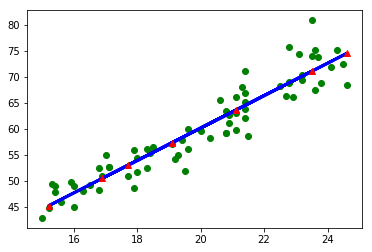

In [43]:
plt.plot(x, y,'go')
plt.plot(X_test, regressao.predict(X_test), color='blue', linewidth=3)
plt.plot(X_test, regressao.predict(X_test),'r^')

  
plt.show()